In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats as st
import pandas as pd
import matplotlib
import os

from statsmodels.distributions.empirical_distribution import ECDF

C:\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Calculation

In [2]:
# List File

folder = 'Data Hujan/'
folder_ch = 'Data Hujan DJFMAM19/'
folder_17 = 'Data Hujan 2017/'
folder_daily = 'Data Hujan Daily DJFMAM19/'

filelist12 = os.listdir(folder_ch)[:-1]
filelist10 = os.listdir(folder_ch)[:-3]

# Get station name

st_name12 = []
for i in filelist12:
    st_name12.append(i[:-5])
st_name10 = []
for i in filelist10:
    st_name10.append(i[:-5])

# 10 Station - FM19

In [4]:
# Choosing date
sdate = '2019-02-01 00:00'
edate = '2019-04-01 00:00'

# Finding daily precipitation
data_ch_all = np.array(())
ch_res = {}
for i in range (len(st_name10)):
    df = pd.read_excel(folder_ch+str(st_name10[i])+'.xlsx')
    idx1 = df[df['Time']== sdate].index.values[0]
    idx2 = df[df['Time']== edate].index.values[0]
    
    data = df['CH'][idx1:idx2].values
    ch_rs = np.reshape(data, (int(data.shape[0]/(6*24)), 6*24))
    ch_res[i] = np.sum(ch_rs, axis=1)
    #ch_res_df = pd.DataFrame(data = {'CH':ch_res[i]})
    #ch_res_df.to_excel(folder_daily+str(st_name10[i])+' daily.xlsx')
    #data_ch_all = np.concatenate((data_ch_all, ch_res), axis=0)

In [5]:
# Finding CDF 80% - 95%
ecdf = {}
cdf80 = {}
cdf85 = {}
cdf90 = {}
cdf95 = {}
for i in range (len(ch_res)):
    ecdf[i] = ECDF(ch_res[i])
    cdf80[i] = ecdf[i].x[ecdf[i].y > 0.80][0]
    cdf85[i] = ecdf[i].x[ecdf[i].y > 0.85][0]
    cdf90[i] = ecdf[i].x[ecdf[i].y > 0.90][0]
    cdf95[i] = ecdf[i].x[ecdf[i].y > 0.95][0]

In [8]:
st_name10

['10rancaekek',
 '1ancolmekar',
 '2cicalengka',
 '3cidurian_balai_arr',
 '4dago_pakar',
 '5hantap.json',
 '6jatiroke_cikuda',
 '7kertasari',
 '8meteo_lembang',
 '9paseh_cipaku']

(-1.0, 100.0)

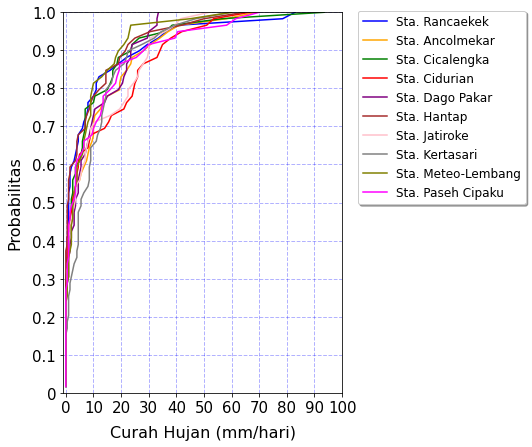

In [12]:
fig, ax = plt.subplots(figsize=(5,7))

station = ['Sta. Rancaekek','Sta. Ancolmekar','Sta. Cicalengka','Sta. Cidurian','Sta. Dago Pakar','Sta. Hantap',
           'Sta. Jatiroke','Sta. Kertasari','Sta. Meteo-Lembang','Sta. Paseh Cipaku']
colors = ['blue','orange','green','red','purple','brown','pink','gray','olive','magenta']

for i in range (len(station)):
    ax.plot(ecdf[i].x, ecdf[i].y, color=colors[i], linewidth=1.5, label=station[i])

legend = ax.legend(loc='lower right', shadow=True, fontsize='large', bbox_to_anchor=(1.68, 0.48))
ax.set_xlabel('Curah Hujan (mm/hari)',fontsize=16, labelpad=10)
ax.set_ylabel('Probabilitas',fontsize=16,labelpad=10)
ax.grid(color='b', alpha=0.3, linestyle='dashed', linewidth=1)
plt.xticks(list(np.arange(0,110,10)), ['0','10','20','30','40','50','60','70','80','90','100'], fontsize=15)
#plt.xticks(list(np.arange(0,60,10)), ['0','10','20','30','40','50'], fontsize=15)
plt.yticks(list(np.arange(0,1.1,0.1)), ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'], fontsize=15)
#plt.yticks(list(np.arange(0,1.1,0.2)), ['0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)
plt.ylim(0,1.)
plt.xlim(-1,100)

#plt.title('Probability Distribution Function (PDF) of 12 Stations', fontsize=20, loc='center', pad=10)

#fig.savefig('FM19 - CDF 12 Station.png',dpi=300,orientation='landscape', bbox_inches='tight')

(-1.0, 100.0)

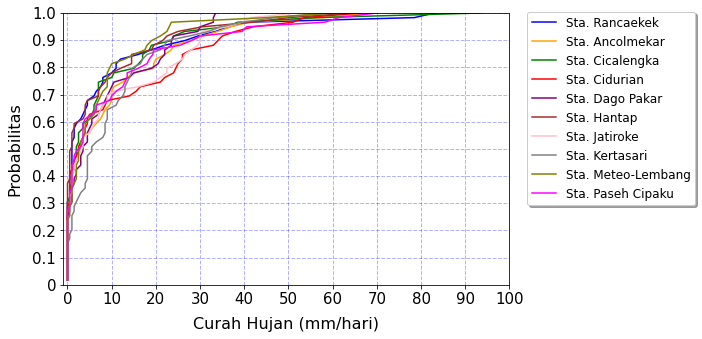

In [21]:
fig, ax = plt.subplots(figsize=(8,5))

station = ['Sta. Rancaekek','Sta. Ancolmekar','Sta. Cicalengka','Sta. Cidurian','Sta. Dago Pakar','Sta. Hantap',
           'Sta. Jatiroke','Sta. Kertasari','Sta. Meteo-Lembang','Sta. Paseh Cipaku']
colors = ['blue','orange','green','red','purple','brown','pink','gray','olive','magenta']

for i in range (len(station)):
    ax.plot(ecdf[i].x, ecdf[i].y, color=colors[i], linewidth=1.5, label=station[i])

legend = ax.legend(loc='lower right', shadow=True, fontsize='large', bbox_to_anchor=(1.43, 0.27))
ax.set_xlabel('Curah Hujan (mm/hari)',fontsize=16, labelpad=10)
ax.set_ylabel('Probabilitas',fontsize=16,labelpad=10)
ax.grid(color='b', alpha=0.3, linestyle='dashed', linewidth=1)
plt.xticks(list(np.arange(0,110,10)), ['0','10','20','30','40','50','60','70','80','90','100'], fontsize=15)
#plt.xticks(list(np.arange(0,60,10)), ['0','10','20','30','40','50'], fontsize=15)
plt.yticks(list(np.arange(0,1.1,0.1)), ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'], fontsize=15)
#plt.yticks(list(np.arange(0,1.1,0.2)), ['0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)
plt.ylim(0,1.)
plt.xlim(-1,100)

#plt.title('Probability Distribution Function (PDF) of 12 Stations', fontsize=20, loc='center', pad=10)

#fig.savefig('FM19 - CDF 12 Station.png',dpi=300,orientation='landscape', bbox_inches='tight')